In [1]:
import os
import torch
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
from ViT import ViT as MyViT

D:\Env\anaconda3\envs\cv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
img_path = "./data/samples/roses.jpg"
model_path = './models/ViT_pre_train_20_epochs.pth'

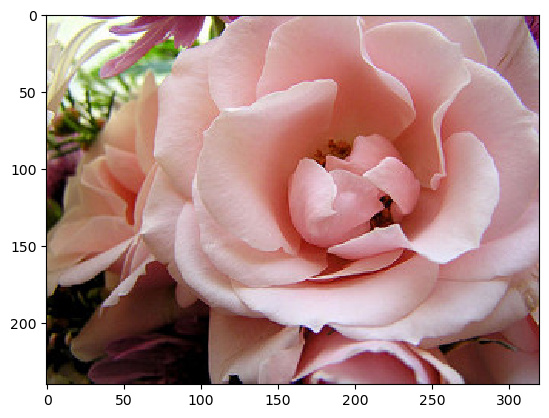

In [3]:
img = Image.open(img_path)
plt.imshow(img)
data_transform = transforms.Compose(
    [transforms.Resize(256),
     transforms.CenterCrop(224),
     transforms.ToTensor(),
     transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])
img = data_transform(img)
img = torch.unsqueeze(img, dim=0)

In [4]:
model = MyViT(num_classes=5).to(device)
model.load_state_dict(torch.load(model_path, map_location=device))
model.eval()
with torch.no_grad():
    # predict class
    output = torch.squeeze(model(img.to(device))).cpu()
    predict = torch.softmax(output, dim=0)
    predict_cla = torch.argmax(predict).numpy()

class: daisy        prob: 0.0726
class: dandelion    prob: 0.0536
class: roses        prob: 0.742
class: sunflowers   prob: 0.00311
class: tulips       prob: 0.129


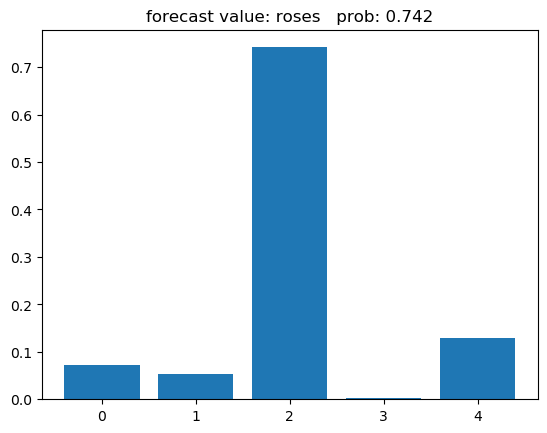

In [8]:
Dict = {"0":"daisy","1":"dandelion","2":"roses","3":"sunflowers","4":"tulips"}

print_res = "forecast value: {}   prob: {:.3}".format(Dict[str(predict_cla)],predict[predict_cla].numpy())
for i in range(len(predict)):
    print("class: {:10}   prob: {:.3}".format(Dict[str(i)],predict[i].numpy()))
plt.title(print_res)
plt.bar(range(len(predict)),predict)
plt.show()